In [4]:
%pip install --quiet --upgrade diffusers transformers accelerate mediapy peft

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.9 MB/s eta 0:00:00


In [5]:
import mediapy as media
import random
import sys
import torch

from diffusers import DiffusionPipeline, TCDScheduler
from huggingface_hub import hf_hub_download

num_inference_steps = 12

base_model_id = "stabilityai/stable-diffusion-xl-base-1.0"
repo_name = "ByteDance/Hyper-SD"
plural = "s" if num_inference_steps > 1 else ""
ckpt_name = f"Hyper-SDXL-{num_inference_steps}step{plural}-CFG-lora.safetensors"
device = "cuda"

pipe = DiffusionPipeline.from_pretrained(base_model_id, torch_dtype=torch.float16, variant="fp16").to(device)
pipe.load_lora_weights(hf_hub_download(repo_name, ckpt_name))
pipe.fuse_lora()
pipe.scheduler = TCDScheduler.from_config(pipe.scheduler.config)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Hyper-SDXL-12steps-CFG-lora.safetensors:   0%|          | 0.00/787M [00:00<?, ?B/s]

The config attributes {'skip_prk_steps': True} were passed to TCDScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


In [6]:
def generate_image(prompt, seed, inference_steps=12, guidance_scale=5.0, eta=0.5):
    images =  pipe(
        prompt=prompt,
        num_inference_steps=inference_steps,
        guidance_scale=guidance_scale,
        eta=eta,
        generator=torch.Generator(device).manual_seed(seed),
    ).images
    print(f"Prompt:\t{prompt}\nSeed:\t{seed}")
    media.show_images(images)
    images[0].save(f"output_{seed}.jpg")

In [ ]:
recipe_name = "Spicy Noodles"

ingredients = ["cup of water", "raw noodles", "spices bowl", "chopped vegetables", "soy sauce"]

steps = [
    "start Boiling water.",
    "Add noodles in boiling water.",
    "Add spices to the boiling noodles.",
    "Add chopped vegetables to the noodles.",
    "Add soy sauce to the noodles.",
    "Cook for 5 minutes, stir occasionally to the boiling noodles."
]

In [7]:
seed = random.randint(0, sys.maxsize)

Generating image for the recipe: Spicy Noodles


  0%|          | 0/12 [00:00<?, ?it/s]

Prompt:	Delicious Spicy Noodles served on a plate
Seed:	5216031044112604267


""

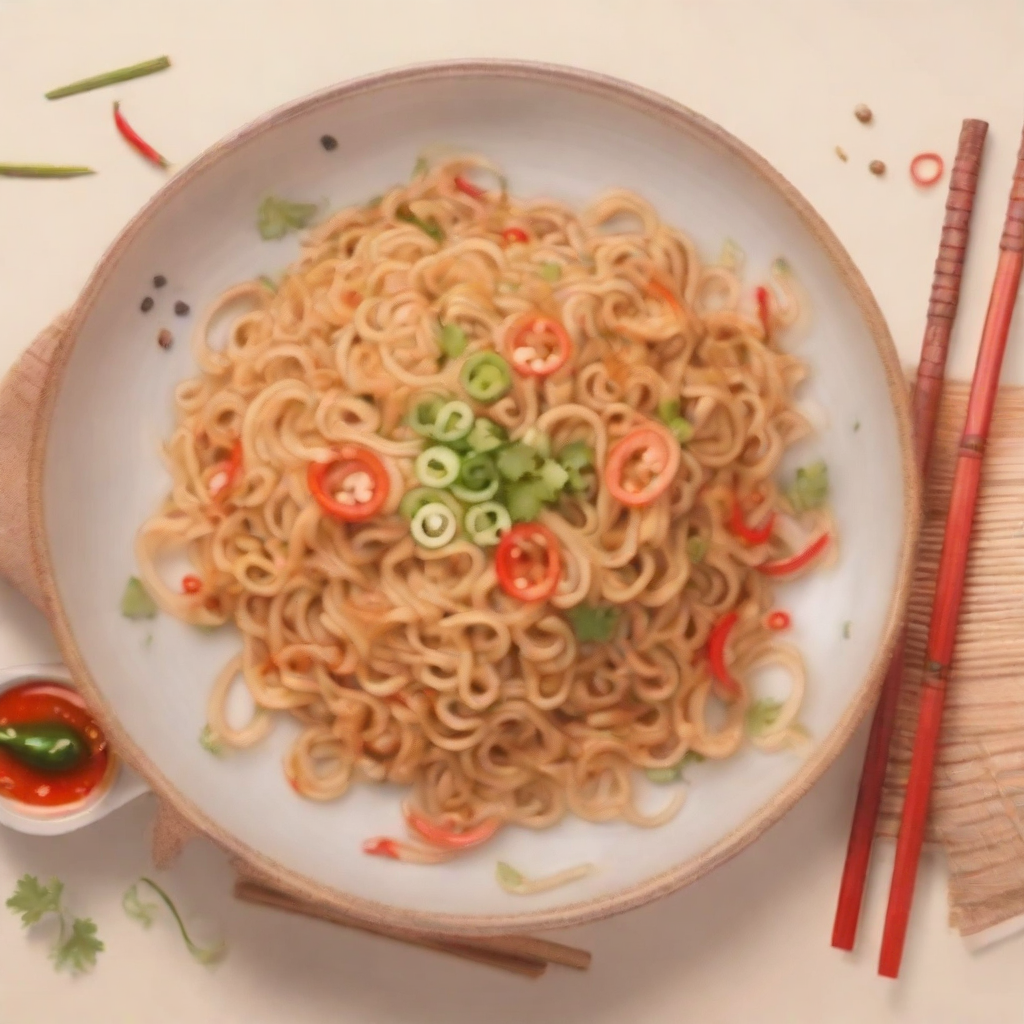

In [ ]:
print(f"Generating image for the recipe: {recipe_name}")
generate_image(f"Delicious {recipe_name} served on a plate", seed)

In [ ]:
print("\nGenerating images for ingredients:")
for ingredient in ingredients:
    print(f"Generating image for ingredient: {ingredient}")
    generate_image(f"Close-up photo of {ingredient}", seed)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print("\nGenerating images for steps:")
for step in steps:
    print(f"Generating image for step: {step}")
    generate_image(f"Step in cooking process: {step}", seed)

Output hidden; open in https://colab.research.google.com to view.

Generating image for the recipe: Spicy Noodles


  0%|          | 0/12 [00:00<?, ?it/s]

Prompt:	Delicious Spicy Noodles served on a plate
Seed:	5216031044112604267


""

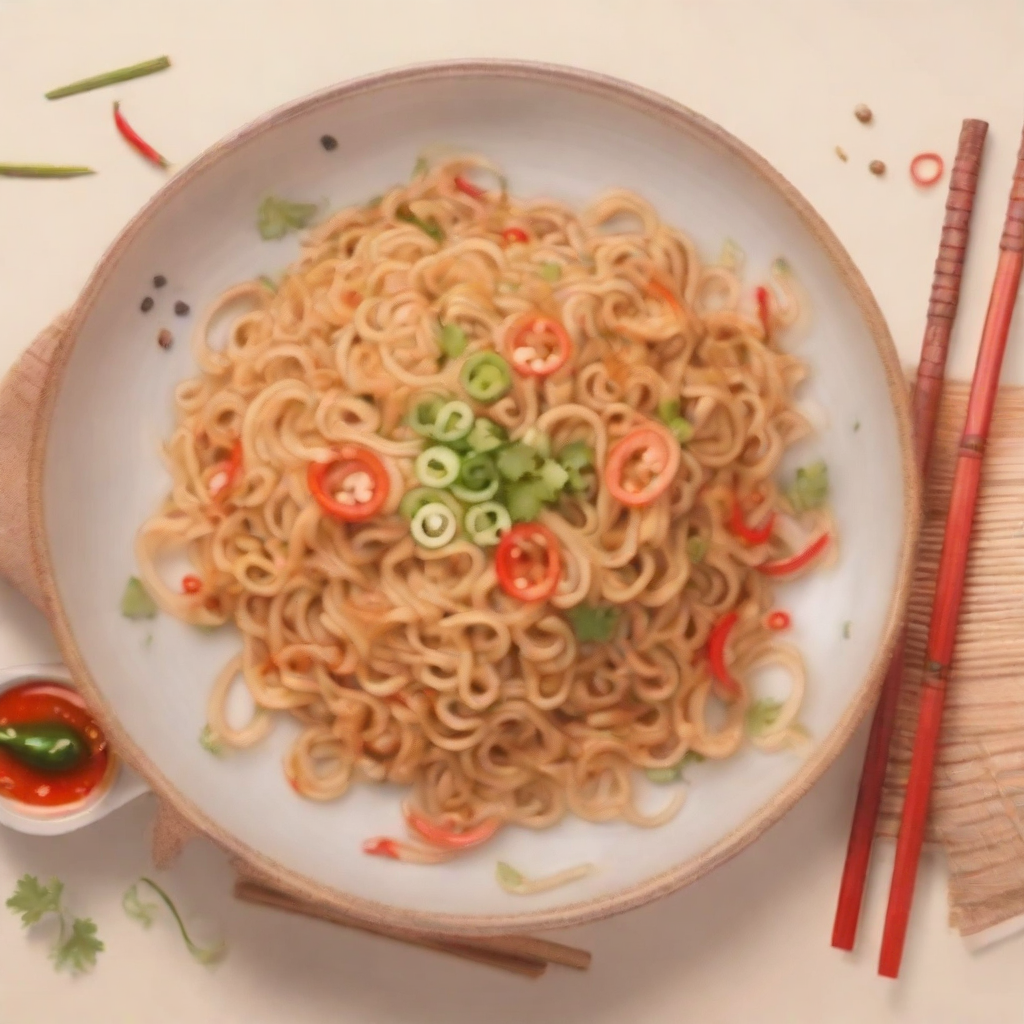

In [ ]:
print(f"Generating image for the recipe: {recipe_name}")
generate_image(f"Delicious {recipe_name} served on a plate", seed)

In [ ]:
burger_name = "Veggie Burger"
burger_ingredients = ["plant-based patty", "burger bun", "slice of cheese", "lettuce", "tomato slices", "onion rings", "pickles"]
burger_steps = [
    "Grill the plant-based patty until it's fully cooked.",
    "Place a slice of cheese on the patty to melt.",
    "Toast the burger buns lightly.",
    "Place the patty with cheese on the bottom bun.",
    "Add lettuce, tomato slices, onion rings, and pickles on top of the patty.",
    "Cover with the top bun to complete the veggie burger."
]

print(f"Generating image for the recipe: {burger_name}")
generate_image(f"Delicious {burger_name} served with fries on a plate", seed)

print("\nGenerating images for burger ingredients:")
for ingredient in burger_ingredients:
    print(f"Generating image for ingredient: {ingredient}")
    generate_image(f"Close-up photo of {ingredient}", seed)

print("\nGenerating images for burger steps:")
for step in burger_steps:
    print(f"Generating image for step: {step}")
    generate_image(f"Step in cooking process: {step}", seed)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
poha_name = "Poha with garnished chopped onions"
poha_ingredients = ["white poha", "mustard seeds", "green chilies", "curry leaves", "chopped onions", "turmeric powder", "salt", "lemon wedge", "coriander leaves", "peanuts"]
poha_steps = [
    "Rinse the poha and let it drain.",
    "Heat oil in a pan and add mustard seeds.",
    "Add green chilies and curry leaves, sauté for a few seconds.",
    "Add chopped onions and cook until they turn translucent.",
    "Add turmeric powder and stir well.",
    "Add the rinsed poha to the pan and mix gently.",
    "Add salt to taste and mix everything well.",
    "Garnish with lemon juice, coriander leaves, and roasted peanuts before serving."
]

print(f"Generating image for the recipe: {poha_name}")
generate_image(f"Delicious {poha_name} served on a plate with garnish", seed)

print("\nGenerating images for Poha ingredients:")
for ingredient in poha_ingredients:
    print(f"Generating image for ingredient: {ingredient}")
    generate_image(f"Close-up photo of {ingredient}", seed)

print("\nGenerating images for Poha steps:")
for step in poha_steps:
    print(f"Generating image for step: {step}")
    generate_image(f"Step in cooking process: {step}", seed)